#Flow of RNN

In [1]:
#Documents having 10 sentences
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

#We have to tokenise our documents......
means split word by word, converts capital letter into small letter, remove special characters etc we have done in TOKENISER.....

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<nothing>')
#oov_token means Out of Vocabulary Token

#oov_token:
suppose we train our model using the above doc, it may happen while at the time of prediction, we'll have some new words which are not present in our training dataset, so this is the solution where these new words will be replaced by 'nothing' word.....

In [3]:
tokenizer.fit_on_texts(docs)

#The fit_on_texts(docs) method:
It goes through each document in docs and updates the internal vocabulary of the tokenizer. It learns the unique words (tokens) from the provided text data and assigns an integer index to each unique word based on its frequency (by default).
#This creates a mapping of words to numerical values.

In [4]:
tokenizer.word_index
# it assign index to each word

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [5]:
tokenizer.word_counts
#frequency count o each word

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [6]:
tokenizer.document_count
#it counts the no.of rows in our document

10

In [7]:
sequences = tokenizer.texts_to_sequences(docs)
sequences
#it generates sequence for each sentence according to index

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

#As u can see above, the sequence size for each word is different means no.of words are different, so we will use PADDING...

In [8]:
from keras.utils import pad_sequences

In [9]:
sequences = pad_sequences(sequences,padding='post')
# post means 0 after sequnec, u can use 'pre' as well

In [10]:
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]])

#Now, our input data is ready....

#RNN algorithm:

In [11]:
from keras.datasets import imdb
#this dataset has reviews and sentiments, already pre-processed
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Flatten

In [12]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


#imdb data is already tokenised....already integer-encoded

In [13]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [14]:
X_train.shape

(25000,)

#25000 reviews are there in training dataset

In [15]:
X_test.shape

(25000,)

#25000 reviews are there in testing dataset

In [16]:
X_train[0]
#it shows integer for each word

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

#firstly, we will equalise length of each review using PADDING bcoz it may differ for each review

In [17]:
len(X_train[0])

218

In [18]:
len(X_train[2])

141

In [19]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
#giving first 50 words for each review as data is too large
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [20]:
# from keras.utils import pad_sequences
# X_train = pad_sequences(X_train,padding='post')
# X_test = pad_sequences(X_test,padding='post')

In [21]:
X_train.shape
#each review has 50 words only

(25000, 50)

In [22]:
X_train

array([[ 2071,    56,    26, ...,    19,   178,    32],
       [ 8255,     5, 25249, ...,    16,   145,    95],
       [  215,    28,   610, ...,     7,   129,   113],
       ...,
       [    4,    65,   496, ...,     4,  3586, 22459],
       [   13,    18,    31, ...,    12,     9,    23],
       [ 7585,     8,  2197, ...,   204,   131,     9]])

In [23]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32])

In [24]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
#50 is timestamp and 1 is feature
#there are 50 words in each review, so these numbers will go thru RNN one by one
#return_sequences=False ...otherwise everytime, output also will go out means to
#the programmer
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

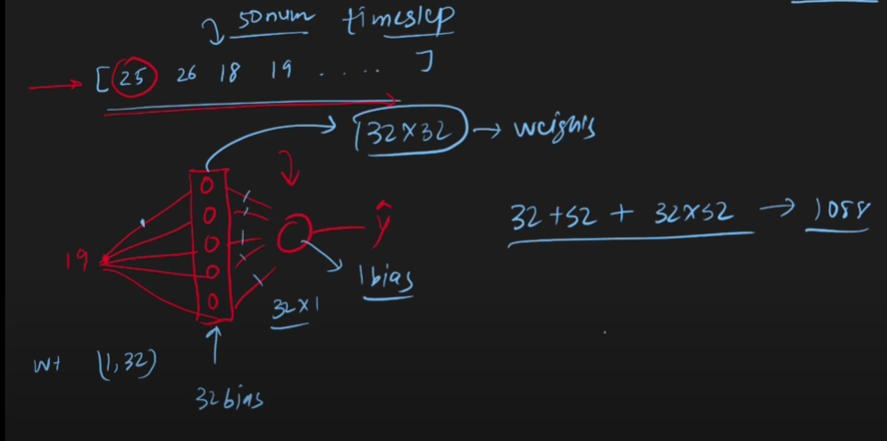

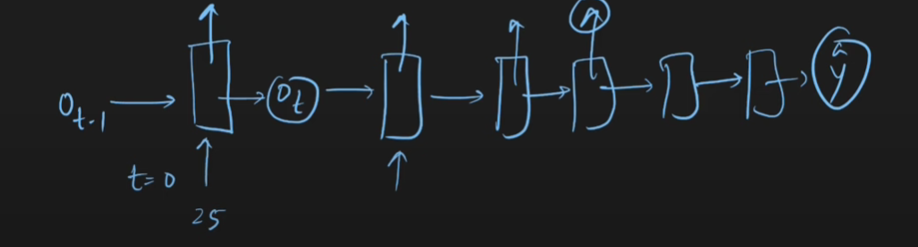

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.5058 - loss: 0.7157 - val_accuracy: 0.5061 - val_loss: 0.6938
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.5008 - loss: 0.6927 - val_accuracy: 0.5018 - val_loss: 0.6943
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.5112 - loss: 0.6929 - val_accuracy: 0.5018 - val_loss: 0.6945
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5094 - val_loss: 0.6951
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.5104 - loss: 0.6928 - val_accuracy: 0.5060 - val_loss: 0.6942
